In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tseries import converter

In [2]:
## Import weather data, dropping unused columns. 
weather = pd.read_csv('/Users/regina/UH_projects/EM_TimeSeries/data/themo_weather0717-0618.csv', 
                 parse_dates=[[0,1]], index_col=0)
weather = weather.drop(columns=['threshold', 'const_err'])
weather = weather[:'2018-02-13']
weather = weather.resample('D').mean()
weather_zoom = weather['2017-08-15':'2017-10-15']
wind_avg = weather_zoom.wind_speed

In [3]:
## Import chlorophyll.
chl = pd.read_csv('/Users/regina/UH_projects/EM_TimeSeries/data/themo_chl0717-0618.csv', 
                 parse_dates=[[0,1]], index_col=0)
chl = chl.drop(columns=['turbidity_units', 'threshold', 'const_err'])
chl = chl[(chl.chlorophyll_concentration < 1.0) & (chl.chlorophyll_concentration > 0)]
chl = chl[:'2018-02-13'] # Remove bad data after February
chl = chl.drop(pd.Timestamp('2017-12-27 09:40:11')) 
chl = chl[:'2017-10-01'] 
chl_zoom = chl['2017-08-15':'2017-10-15']
chl_avg = chl_zoom.chlorophyll_concentration.resample('D').mean()

In [5]:
## Import temperature, create zone1 areas
tmp = pd.read_csv('/Users/regina/UH_projects/EM_TimeSeries/data/themo_sst0717-0618.csv',
                   parse_dates=[[0, 1]], index_col=0)
tmp = tmp.drop(columns=['s9_id', 'threshold', 'const_err'])
tmp = tmp[(tmp.temperature < 50) & (tmp.temperature > 20)]
tmp = tmp[:'2018-02-13']
tmp = tmp.drop(pd.Timestamp('2017-12-23 17:00:00'))
tmp = tmp.drop(pd.Timestamp('2017-12-02 18:30:00'))
tmp = tmp.drop(pd.Timestamp('2017-09-01 07:00:00'))
tmp = tmp['2017-08-15':'2017-10-15']
zone1 = tmp[tmp.depth < 30].rename(columns={"temperature": "zone1"})
zone1 = zone1.drop(columns=['depth'])
zone1_avg = zone1.zone1.resample('D').mean()


In [6]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

{'_stale': True, 'stale_callback': <function _stale_axes_callback at 0x10b8268c8>, '_axes': <matplotlib.axes._subplots.AxesSubplot object at 0x1154fc8d0>, 'figure': <Figure size 1152x720 with 3 Axes>, '_transform': <matplotlib.transforms.IdentityTransform object at 0x115bb2940>, '_transformSet': False, '_visible': True, '_animated': False, '_alpha': None, 'clipbox': None, '_clippath': None, '_clipon': True, '_label': '', '_picker': None, '_contains': None, '_rasterized': None, '_agg_filter': None, '_mouseover': False, 'eventson': False, '_oid': 0, '_propobservers': {}, '_remove_method': <bound method Axes._remove_legend of <matplotlib.axes._subplots.AxesSubplot object at 0x1154fc8d0>>, '_url': None, '_gid': None, '_snap': None, '_sketch': None, '_path_effects': [], '_sticky_edges': _XYPair(x=[], y=[]), '_in_layout': True, 'prop': <matplotlib.font_manager.FontProperties object at 0x1155d7d68>, '_fontsize': 15.0, 'texts': [Text(0, 0, 'Chlorophyll'), Text(0, 0, 'Temperature'), Text(0, 0, 

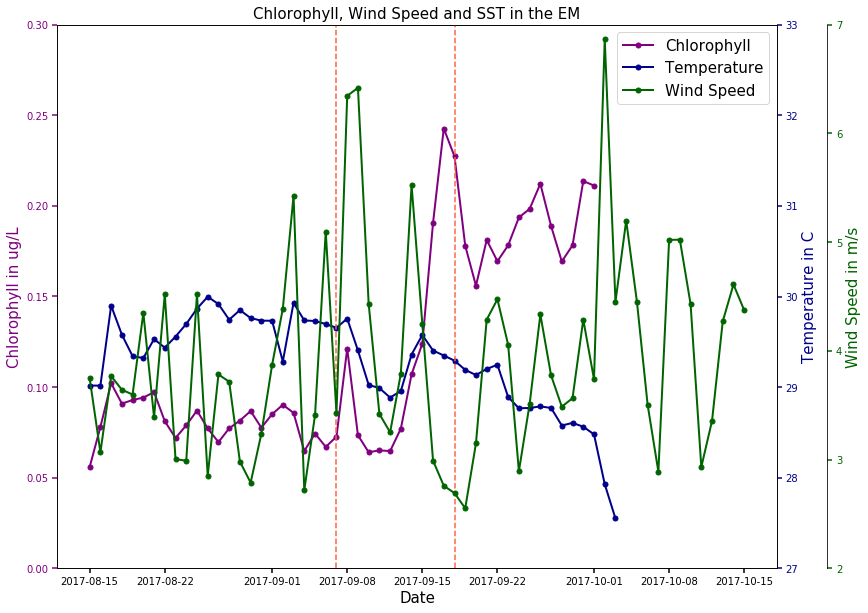

In [10]:
fig, host = plt.subplots(figsize=(16,10))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()


par2.spines["right"].set_position(("axes", 1.07))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(chl_avg, color='purple', marker='o', 
                markersize=5, linewidth=2, label='Chlorophyll')
p2, = par1.plot(zone1_avg, color='darkblue', marker='o', 
                markersize=5, linewidth=2, label='Temperature')
p3, = par2.plot(wind_avg, color='darkgreen', marker='o', 
                markersize=5, linewidth=2, label='Wind Speed')

host.set_xlabel("Date", fontsize=15)
host.set_ylabel("Chlorophyll in ug/L", fontsize=15)
par1.set_ylabel("Temperature in C", fontsize=15)
par2.set_ylabel("Wind Speed in m/s", fontsize=15)
host.set_ylim([0, 0.3])
par1.set_ylim([27, 33])
par2.set_ylim([2.0, 7])


host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=5, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

plt.title("Chlorophyll, Wind Speed and SST in the EM", fontsize=15)
legend = plt.legend(handles=lines, loc=0, fontsize=15)
print(legend.__dict__)
par1.axvline('2017-09-07', color='tomato', linestyle='--')
par1.axvline('2017-09-18', color='tomato', linestyle='--')
plt.show()

Text(2017-10-02 00:00:00, 6.86625, 'Max Speed')

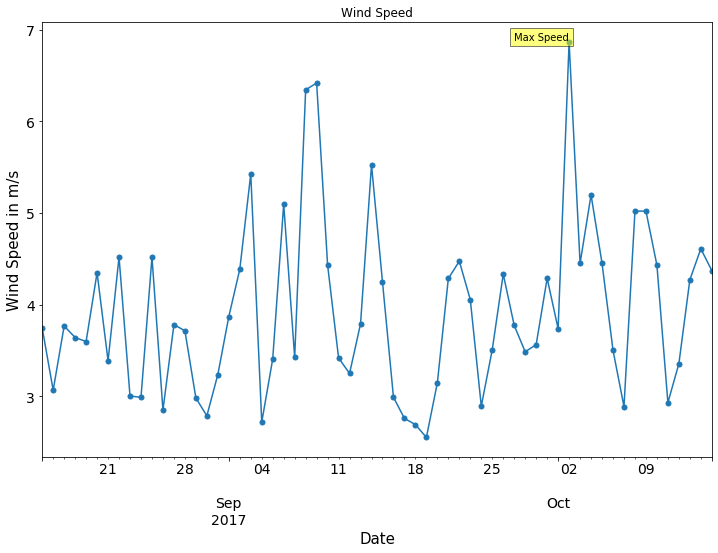

In [48]:
## Replot with each series on a different line
## Wind Speed graph
windplot = wind_avg.plot(title="Wind Speed", figsize=(12,8), 
                        fontsize=14, marker='o', markersize=5)
windplot.set_xlabel("Date", fontsize=15),windplot.set_ylabel("Wind Speed in m/s", fontsize=15)

y0 = max(wind_avg.values)
x0 = wind_avg.idxmax(axis = 0) 

windplot.annotate(
        "Max Speed", xy=(x0,y0), ha='right',
        va='bottom', bbox=dict(BoxStyle='Round, pad=0.5', fc='yellow',
        alpha=0.5), arrowprops=dict(facecolor='black', shrink=0.05))

(Text(0.5, 0, 'Date'), Text(0, 0.5, 'Chlorophyll in ug/L'))

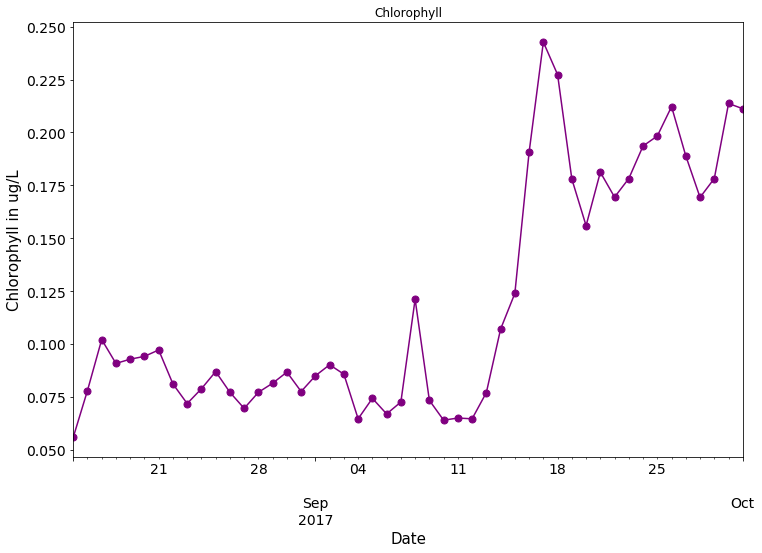

In [49]:
## Chlorophyll
chlplot = chl_avg.plot(title="Chlorophyll", figsize=(12,8), 
                        fontsize=14, color='purple', marker='o', markersize=7)
chlplot.set_xlabel("Date", fontsize=15),chlplot.set_ylabel("Chlorophyll in ug/L", fontsize=15)

(Text(0.5, 0, 'Date'), Text(0, 0.5, 'Temperature in C'))

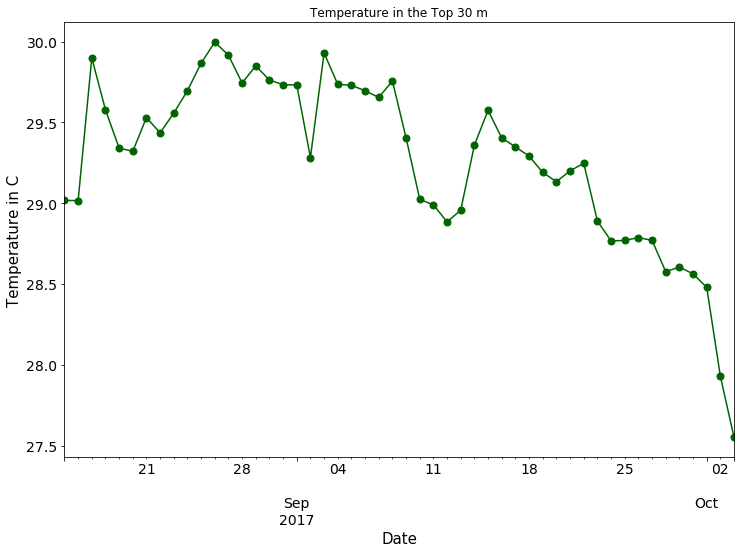

In [50]:
## Temperature Average
tempplot = zone1_avg.plot(title="Temperature in the Top 30 m", figsize=(12,8), 
                        fontsize=14, color='darkgreen', marker='o', markersize=7)
tempplot.set_xlabel("Date", fontsize=15),tempplot.set_ylabel("Temperature in C", fontsize=15)